# Deep Learning Classification

Dataset -> Liver Patient


In [1]:
raw_data_path = "https://raw.githubusercontent.com/tarun9804/misc/main/Datasets/Classification/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(raw_data_path)

In [4]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.Selector.value_counts()

Selector
1    416
2    167
Name: count, dtype: int64

In [6]:
df.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    0
Selector     0
dtype: int64

In [10]:
df.shape

(579, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        579 non-null    int64  
 1   Gender     579 non-null    object 
 2   TB         579 non-null    float64
 3   DB         579 non-null    float64
 4   Alkphos    579 non-null    int64  
 5   Sgpt       579 non-null    int64  
 6   Sgot       579 non-null    int64  
 7   TP         579 non-null    float64
 8   ALB        579 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   579 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 54.3+ KB


In [17]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1.0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1.0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1.0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1.0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1.0


In [18]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [19]:
le = LabelEncoder()
df.Selector = le.fit_transform(df.Selector)

In [20]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [21]:
df.Selector.value_counts()

Selector
0    414
1    165
Name: count, dtype: int64

In [22]:
y = df.Selector

In [23]:
df.drop(columns='Selector',inplace=True)

In [27]:
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(exclude='object').columns

In [30]:
cat_pipe = Pipeline([("OneHot",OneHotEncoder())])
num_pipe = Pipeline([("Scalar",StandardScaler())])
ct = ColumnTransformer([("cat_pipe",cat_pipe,cat_col),
                        ("num_pipe",num_pipe,num_col)])
x = ct.fit_transform(df)

In [31]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=23
)

In [39]:
import tensorflow as tf

In [40]:
x_train =tf.constant(x_train)
y_train = tf.constant(y_train)

## building model

In [51]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5,activation="relu",
                               input_shape = x_train[0].shape))
model.add(tf.keras.layers.Dense(5,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = [tf.keras.metrics.Precision(),"accuracy"]
)

model.fit(x_train,y_train,epochs=100,verbose=0)

model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.5910 - precision_2: 0.3333 - accuracy: 0.7155


[0.5910100340843201, 0.3333333432674408, 0.7155172228813171]

In [52]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 1ms/step


In [56]:
y_pred = np.round(y_pred)

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
cm = confusion_matrix(y_test,y_pred)

In [60]:
cm

array([[82,  2],
       [31,  1]], dtype=int64)

<Axes: >

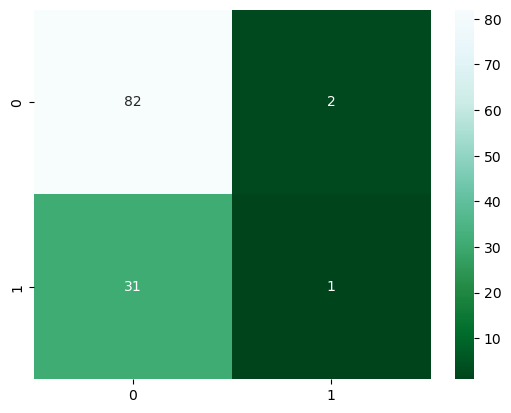

In [63]:
sns.heatmap(cm,annot=True,cmap=plt.cm.BuGn_r)

In [64]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(5,activation="relu",
                               input_shape = x_train[0].shape))
model.add(tf.keras.layers.Dense(5,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation="sigmoid"))

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.Precision(),"accuracy"]
)

model.fit(x_train,y_train,epochs=100,verbose=0)

model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.6028 - precision_3: 0.3500 - accuracy: 0.6724


[0.6028192043304443, 0.3499999940395355, 0.6724137663841248]

4/4 [==============================] - 0s 2ms/step


<Axes: >

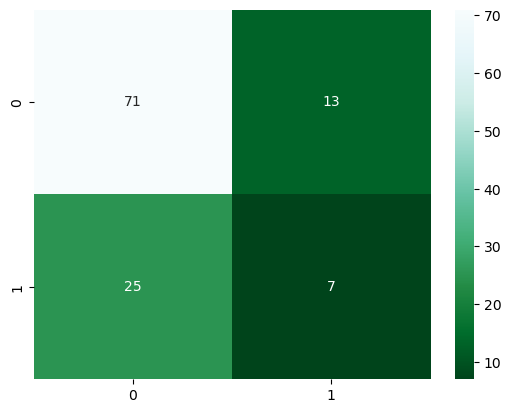

In [66]:
y_pred = model.predict(x_test)
y_pred = np.round(y_pred)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap=plt.cm.BuGn_r)

In [68]:
model.input_shape

(None, 11)

In [69]:
model.output_shape

(None, 1)

In [73]:
model.output_shape

(None, 4)

In [74]:
model.input_shape

(None, 11)

In [75]:
x_train[0].shape

TensorShape([11])

In [76]:
cm

array([[71, 13],
       [25,  7]], dtype=int64)